# **ESRGAN for increasing resolution**
####**-SEEMS TO ONLY WORK CONSISTENTLY ON CHROME!!**
#### **-DOUBLE CHECK YOUR RUNTIME TYPE IS SET TO GPU**
example: an image with height 500px by width 500px scaled to an image with height 1762px by width 1762px

**You might need to go to Runtime>Restart Runtime**

If you open the folder icon (in the left menu) you will see all your files, the good thing about doing **Runtime>Restart Runtime** is that it keeps all the files you downloaded but Restarts the Memory on the Cloud Computer so you can put the ESRGAN model in memory, compared to **Runtime>Factory Reset Runtime** which Restarts the whole Cloud Computer to a default clear state.


In [ ]:
#@markdown # **1) Download required Libraries**
# # Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
%cd ..

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 561, done.
remote: Total 561 (delta 0), reused 0 (delta 0), pack-reused 561
Receiving objects: 100% (561/561), 4.64 MiB | 26.37 MiB/s, done.
Resolving deltas: 100% (288/288), done.
/content/Real-ESRGAN
     |████████████████████████████████| 161 kB 12.9 MB/s 
     |████████████████████████████████| 5.8 MB 62.2 MB/s 
     |████████████████████████████████| 190 kB 85.5 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.9-py3-none-any.whl size=194438 sha256=6dfe4e749129933c9098a3adf9eb977a6d6434ecd349c04450409361429d257e
  Stored in directory: /root/.cache/pip/wheels/92/52/70/341916b8c102f1e4416695e601d4aa71ba34d1080f7aa47cf5
Successfully built basicsr
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 177 kB 29.0 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=4b1b8364e69fe3e9999c7d07e8117e6f4c6e8f15eea565f1522c6f12cb2b2428
  Store

In [ ]:
#@markdown # **2) Run this block and Upload image using the DIALOG box! Wait till it loads the image and once it's done run the next block**
#@markdown You can drag and drop into choose files button
%cd Real-ESRGAN
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)
%cd ..

/content/Real-ESRGAN


Saving image.png to image.png
move image.png to upload/image.png
/content


In [ ]:
#@markdown # **3) Run ERSGAN on Uploaded Image**
%cd Real-ESRGAN
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4 --half --face_enhance
# !python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input upload --netscale 4 --outscale 3.5 --half --face_enhance
%cd ..

/content/Real-ESRGAN
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:05<00:00, 20.7MB/s]
Downloading: "https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth" to /usr/local/lib/python3.7/dist-packages/gfpgan/weights/GFPGANCleanv1-NoCE-C2.pth

100% 332M/332M [00:38<00:00, 9.13MB/s]
Testing 0 image
/content


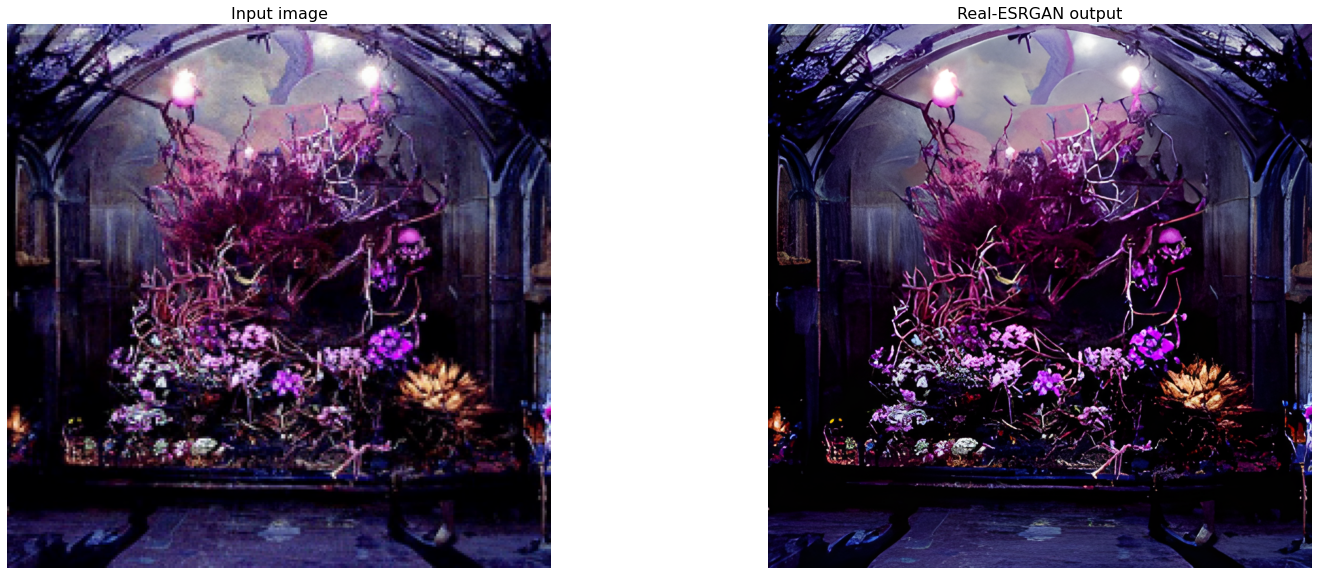

In [ ]:
#@markdown # **4) Compare before ESRGAN and after ESRGAN image** (Optional. You can skip this block if you want to)
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'Real-ESRGAN/upload'
result_folder = 'Real-ESRGAN/results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
#@markdown # **5) Download Super Enhanced Image**

from google.colab import files

filename= os.listdir('/content/Real-ESRGAN/results')
files.download('/content/Real-ESRGAN/results/'+filename[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>